# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [104]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
data.shape

(1338, 7)

In [106]:
print(data.isnull().values.sum())

0


# Question 2 - Check the distribution of expenses(charges) and state your insights.

In [107]:
# null Hypo : data was drawn from a normal distribution.
# Alternative Hypo : data was not drawn from a normal distribution.
from scipy import stats
NormalTest = stats.shapiro(data["charges"])

NormalTest[1]

if NormalTest[1] < 0.05:
    print("Do not reject Null Hypo/n")
    print("Conclusion : data was drawn from a normal distribution")
else :
    print("Reject Null Hypo/n")
    print("Conclusion : data was not drawn from a normal distribution")


Do not reject Null Hypo/n
Conclusion : data was drawn from a normal distribution


# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [108]:
correlation_1 = data.corr(method='pearson')
correlation_1

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Question 4 - Visualize the relationship among various variables/features. 

You can use pairplot function and create a scatterplot matrix to do so.

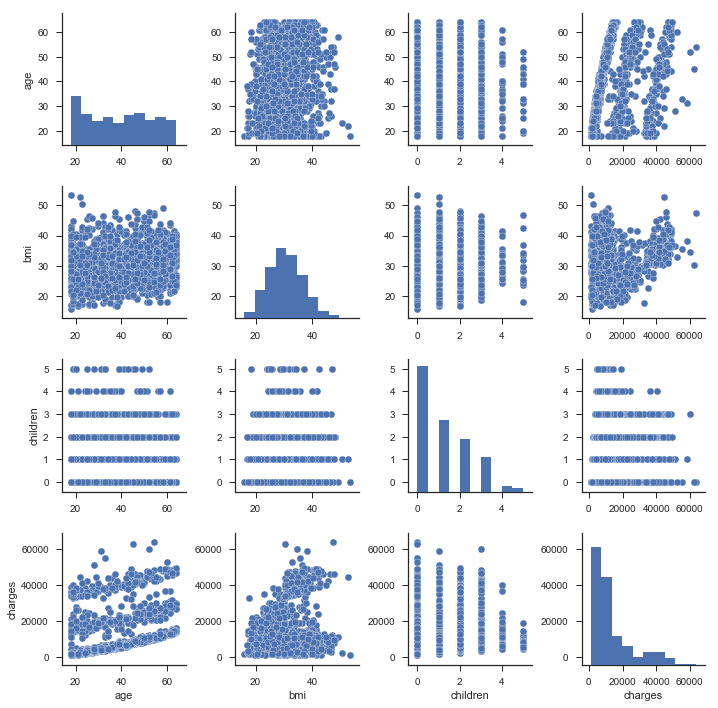

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)


# Question 5 - Get the train and test data from your dataset.

In [110]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [137]:
y = data.charges
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1070, 8) (1070,)
(268, 8) (268,)


In [138]:
#y_train

# Question 6 - Create the dummies for the categorical variables/features.

You can use pd.get_dummies() function to do so.

In [113]:
DummiesDataSet = pd.get_dummies(data, prefix=['sex', 'smoker','region'])
DummiesDataSet.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Question 7 - Train your model.

In [154]:
X = DummiesDataSet[['age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest']]
#X = data[['age','bmi','children','sex','smoker','region']]
X = sm.add_constant(X)

In [155]:
y = DummiesDataSet[['charges']]
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1070, 12) (1070, 1)
(268, 12) (268, 1)


In [156]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
#linearmodel = sm.ols(formula = y_train ~ )

In [174]:
model_1 = sm.OLS(y_train, X_train).fit()
predictions = model_1.predict(X_train) 

print_model_1 = model_1.summary()
print(print_model_1)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     432.4
Date:                Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                        23:17:13   Log-Likelihood:                -10792.
No. Observations:                1070   AIC:                         2.160e+04
Df Residuals:                    1061   BIC:                         2.165e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -298.7547    469.148  

In [164]:
list(X_train.columns.values)

['const',
 'age',
 'bmi',
 'children',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [ ]:
#P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
#in above equation we found that 'Sex' and 'Region' are not significant with 'Charges' column, thus we elemenate those and
#rerun above model

In [187]:
X_train_1 = X_train[['const','age','bmi','smoker_no','smoker_yes']]

In [188]:
model_2 = sm.OLS(y_train, X_train_1).fit()
predictions = model_2.predict(X_train_1) 

print_model_2 = model_2.summary()
print(print_model_2)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                        23:33:03   Log-Likelihood:                -10802.
No. Observations:                1070   AIC:                         2.161e+04
Df Residuals:                    1066   BIC:                         2.163e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        174.0113    683.529      0.255      0.7

In [177]:
model_3 = sm.OLS(y_test, X_test).fit()
predictions = model_3.predict(X_test) 

print_model_3 = model_3.summary()
print(print_model_3)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     76.25
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           1.10e-63
Time:                        23:20:06   Log-Likelihood:                -2746.7
No. Observations:                 268   AIC:                             5511.
Df Residuals:                     259   BIC:                             5544.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -212.6633   1057.247  

In [184]:
X_test_1 = X_test[['const','age','bmi','smoker_no','smoker_yes']]

In [189]:
model_4 = sm.OLS(y_test, X_test_1).fit()
predictions = model_4.predict(X_test_1) 

print_model_4 = model_4.summary()
print(print_model_4)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           1.63e-68
Time:                        23:34:34   Log-Likelihood:                -2748.1
No. Observations:                 268   AIC:                             5504.
Df Residuals:                     264   BIC:                             5518.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        171.3263   1533.394      0.112      0.9

# Question 8 - Fit your model and get the summary of model.

In [190]:
model_2 = sm.OLS(y_train, X_train_1).fit()
predictions = model_2.predict(X_train_1) 

print_model_2 = model_2.summary()
print(print_model_2)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                        23:34:44   Log-Likelihood:                -10802.
No. Observations:                1070   AIC:                         2.161e+04
Df Residuals:                    1066   BIC:                         2.163e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        174.0113    683.529      0.255      0.7

In [181]:
#model_4 = sm.OLS(y_test, X_test_1).fit()
#predictions = model_4.predict(X_test_1) 

#print_model_4 = model_4.summary()
#print(print_model_4)

# Question 9 - Predict the charges and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [ ]:
#Recall that the equation for Multiple Linear Regression is:
#    Y = C + M1*X1 + M2*X2 

#So for our example, it would look like this:
# charges = (const coef) + (age coef)*age + (bmi coef)*bmi + (smoker_no coef)*smoker_no + (smoker_yes coef)*smoker_yes

#And this is how our equation would look like once we plug the coefficients:
#charges = (174.0113) + (252.7198)*age + (330.0413)*bmi + (-1.186e+04)*smoker_no + (1.203e+04)*smoker_yes


In [210]:
#lets predict the value
data_FirstRow = DummiesDataSet.head(1)
charges_actual = data_FirstRow['charges'][0]
charges_cal = ((174.0113) + (252.7198)*data_FirstRow['age'][0] +
               (330.0413)*data_FirstRow['bmi'][0] + (-1.186e+04)*data_FirstRow['smoker_no'][0] + 
               (1.203e+04)*data_FirstRow['smoker_yes'][0])
charges_cal
charges_error = charges_actual - charges_cal
charges_error

-9328.9157699999996

In [ ]:
# Adj. R-squared: 0.760
#Thus we can say that our model is 76 % correct.

# Question 10 - What are some ideas to improve your model performance? 

It is a subjective question, you are not expected to give code and output in this last question.
Just think of the ways which can be helpful in improving your model performance.

In [ ]:
#1. Add and remove some varible among given variable in data We can see there is slightly change in R Square data
#2. By looking at correlation among variable, ve can adjust the veriable while adding or removing in Linear regression model
#3. Plot graph against target variable and regression variable one by one and see if there any heteroscedasticity is available, if any then 
# try to give special treatment to reduce heteroscedasticity
#4. after heteroscedasticity treatment rerun the model and check for R Square
# oce complet with final model, declare significant variables